# DS 3000 HW 5

Due: Tue Mar 16 @ 11:59 PM EST

### Submission Instructions
Submit this `ipynb` file to gradescope.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run "Kernel > Restart & Run All" just before uploading the `ipynb` file to gradescope.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or post a piazza note if you have a specific question about your work you'd like another pair of eyes to talk through.  (Remember, mark your piazza note private if it contains anything which may be considered a solution to the exercise).

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment.  For example, a python trick I find particularly clever (and useful, sometimes):

```python
from collections import defaultdict

def tree(): 
    # https://gist.github.com/hrldcpr/2012250
    return defaultdict(tree)
```

You need not cite the official python documentation or the documentation of any python library which is imported in the template (e.g. matplotlib, numpy, scipy).

**Documentation / style counts for credit**  Please see our course's python style guide, available on canvas, for further information.

## Part 1 (10 points)

By examining the correlation matrix given below, offer a description of the passenger most likely to survive the titanic disaster.  Your description should be easily understood by non-technical readers.  One example recipe might be:

To survive the Titanic, the ideal passenger should ...
1. not be alone
1. have as many siblings and parents aboard as possible
1. pay a low fare

- Be sure to order your description from the most to least important feature
    - According to the example above ...
        - its most important to not be alone
        - the next most import feature is to have as many siblings / parents
        - the next most import feature is to pay a low fare ...
- Be sure to include all other features in the dataset which are not `survived`.

A dataset dictionary is given below.


| Feature    | Description                                               |
|------------|-----------------------------------------------------------|
| survived   | 1 if passenger survived, 0 otherwise                      |
| pclass     | passenger class (1=first, 2=second, …)                    |
| age        | age in years                                              |
| sibsp      | total siblings & spouses aboard (not including passenger) |
| parch      | total parents & children aboard (not including passenger) |
| fare       | price paid for ticket                                     |
| adult_male | 1 if passenger is male, 0 otherwise                       |
| alone      | 1 if passenger traveling alone, 0 otherwise               |

If you'd like, you're welcome to make scatter plots to check your interpretation.  This question aims to exercise your ability to interpret a correlation matrix in an application.  See how much you can sort for yourself before scattering to check your work.

In [1]:
import seaborn as sns
df_titanic = sns.load_dataset('titanic')
df_titanic.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [2]:
import pandas as pd
from datetime import datetime
from datetime import timedelta
from copy import copy
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## from the correlation graph that we see above, 
### we can get the info that: 
#### To survive the Titanic, the ideal passenger should:
1. be female
2. be in first class or first class
3. is to pay a higher fare
4. the next one it to have company， not alone
5. is to have as more parents and children aboard
6. is to be younger
7. last one is to have more siblings or spouses on aboard

# NUFlex Seating

The remainder of the HW deals with NUFlex seating data which describes how many students requested and were permitted to join class in person for each lesson.

## Pseudonymizing data
You'd be surprised just what data can be sensitive:

https://piazza.com/class/kjzwrutpcgn2hv?cid=81

Its often the case that we 'Pseudonymize' (use random fake pseudonyms instead of personally identifiable information) a dataset by storing a code which maps some sensitive information to a consistent tag.

|   |                  Week |   CRN | Subject |                 Course Name | Student ID | Remote Learner | Mon |     Tue | Wed | Thu |     Fri | Sat | Sun |
|--:|----------------------:|------:|--------:|----------------------------:|-----------:|---------------:|----:|--------:|----:|----:|--------:|----:|----:|
| 0 | 02/22/2021-02/28/2021 | 35214 |      DS | Foundations of Data Science |   91132339 |              No | NaN | REM Yes | NaN | NaN | REM Yes | NaN | NaN |
| 1 | 02/08/2021-02/14/2021 | 35214 |      DS | Foundations of Data Science |   91132339 |              No | NaN | REM Yes | NaN | NaN | REM Yes | NaN | NaN |
| 2 | 02/15/2021-02/21/2021 | 35214 |      DS | Foundations of Data Science |   91132339 |              No | NaN | REM Yes | NaN | NaN | REM Yes | NaN | NaN |
| 3 | 01/18/2021-01/24/2021 | 35214 |      DS | Foundations of Data Science |   91132339 |              No | NaN |  INP No | NaN | NaN |  INP No | NaN | NaN |
| 4 | 03/01/2021-03/07/2021 | 35214 |      DS | Foundations of Data Science |   91132339 |              No | NaN | REM Yes | NaN | NaN | REM Yes | NaN | NaN |

To protect student privacy, this data has already been pseudonymized by replacing all NUIDs with random 9 digit numbers.

To read more about the difference between "pseudonymization" and "anonymization" see [this link](https://gathercapture.com/latest/anonymous-pseudonymous-data-are-they-important) (not necessary for homework).

### Generating a pseudonym
[Universally Unique Identifiers](https://en.wikipedia.org/wiki/Universally_unique_identifier) is a CS term for a unique name:

In [4]:
from uuid import uuid4

# a good random pseudonym/alias
str(uuid4())

'd3c3b527-8714-4f12-86c4-ac1a1a6517ee'

In [5]:
# a good enough random alias for us (doesn't need to be as long to be unique)
str(uuid4())[:6]

'44d128'

You can read more about the process in the [python docs for uuid4()](https://docs.python.org/3/library/uuid.html#uuid.uuid4) but its sufficient to know that there are so many unique output strings of `uuid4()` that we can assume no two calls return the same id.

## Part 2: 14 points

Pseudonymize `df_nuflex` (again) by completing the tasks below:

Note that the pseudonymiaztion must be consistent: all observations of a particular student ID in the original DataFrame are replaced with an identical pseudonym.

1. Load `nuflex_ds3000_Mar5_noname.csv` to a DataFrame
1. Write a `pseudonymize_col()` function which:
    * accepts a DataFrame and column
    * returns `pseudo_map_dict`
        - keys are the unique items observed in original column of dataframe
        - values are the new pseudnyms
    * the function should operate on the input DataFrame by replacing each item in the given column with a pseudonym
    * Note that the pseudonymiaztion must be consistent: all observations of a particular student ID in the original DataFrame are replaced with an identical pseudonym
1. call `pseudonymize_col()` and save the resulting `df_nuflex` as `nuflex_ds3000_Mar5_anon.csv`

[This example](https://colab.research.google.com/drive/1VdikAnXZEBx3tGxclDG-BC-psr_D_DBN?usp=sharing) may help clarify the expected behavior of `pseudonymize_col()`.

Notice that we save `pseudo_map_dict` to ensure the pseudonymiazation can be undone.  What if some medical study uncovers a health problem with a participant and must contact them?  A study should be able to "undo" the pseudonymization to recover the original participants identiy.

In [6]:
def pseudonymize_col(dataframe, column):
    """ encodes a student's ID number so each one would have a identical one encoded id 
    
    Args:
        dataframe(DataFrame): the dataframe that has all of the info, columns
        column(string): the string matched with the name of the column that we want to repalce id.
    Returns:
        pseudo_map_dict(dic): returns a dictionary with the encoded column replaced the original one. 
    """       
  
    # select the column
    columndata = dataframe[column]
   
    # create the dic for the laster using to store the value.
    pseudo_map_dict = {}
    # index to track down which row it is 
    i = 0
    
    # for loop to replace each row of student id and store it in the dic
    for student_id in columndata:
        
        # get the student_id, as the key, value, if the id is not in the dic, then just assign the value as str(iidu4)[:6]
        pseudo_map_dict.setdefault(student_id, str(uuid4())[:6])
        
        
        # replacing it with original student ID
        columndata.replace(columndata[i], pseudo_map_dict[student_id], inplace = True)
        
        # add the index to go to the next row. 
        i = i + 1
    
    # return dict so we can undo the changes
    return pseudo_map_dict

In [7]:
# call the function script. 
df_nuflex = pd.read_csv('nuflex_ds3000_Mar5_noname-1.csv')
df_nuflex


,Week,CRN,Subject,Course Name,Student ID,Remote Learner,Mon,Tue,Wed,Thu,Fri,Sat,Sun
0,02/22/2021-02/28/2021,35214,DS,Foundations of Data Science,417693032,No,NaN,REM Yes,NaN,NaN,REM Yes,NaN,NaN
1,02/08/2021-02/14/2021,35214,DS,Foundations of Data Science,417693032,No,NaN,REM Yes,NaN,NaN,REM Yes,NaN,NaN
2,02/15/2021-02/21/2021,35214,DS,Foundations of Data Science,417693032,No,NaN,REM Yes,NaN,NaN,REM Yes,NaN,NaN
3,01/18/2021-01/24/2021,35214,DS,Foundations of Data Science,417693032,No,NaN,INP No,NaN,NaN,INP No,NaN,NaN
4,03/01/2021-03/07/2021,35214,DS,Foundations of Data Science,417693032,No,NaN,REM Yes,NaN,NaN,REM Yes,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,02/01/2021-02/07/2021,35213,DS,Foundations of Data Science,513204328,No,NaN,INP No,NaN,NaN,INP No,NaN,NaN
1331,01/18/2021-01/24/2021,35213,DS,Foundations of Data Science,513204328,No,NaN,INP No,NaN,NaN,INP No,NaN,NaN
1332,01/25/2021-01/31/2021,35213,DS,Foundations of Data Science,513204328,No,NaN,INP No,NaN,NaN,INP No,NaN,NaN
1333,02/08/2021-02/14/2021,35213,DS,Foundations of Data Science,513204328,No,NaN,INP No,NaN,NaN,INP No,NaN,NaN


In [8]:
pseudonymize_col(df_nuflex, "Student ID")

{417693032: '384874',
 243580377: '451b5a',
 987744431: '4d668e',
 636393365: 'd18be4',
 515770817: '42b098',
 768281748: 'e2962e',
 37003809: 'd0bbe7',
 885408952: '45d140',
 481447463: '064ea8',
 858778667: '7c918f',
 944072762: 'ccddfe',
 2946945: '8bca06',
 576702668: '75bd85',
 351544501: '1cdc8e',
 474057614: '828bb0',
 509920705: '6ab6f8',
 412739491: '3ba681',
 450308072: '762317',
 470060416: '861a85',
 722565855: '337605',
 38521395: '3c6c1b',
 356965413: '028aa9',
 632108113: 'de6570',
 226866548: '6fe94b',
 299008771: '35f3bb',
 627487328: '35538c',
 773332798: '611ff0',
 73116247: 'ddd63e',
 565799062: '7f80c5',
 885122494: '524baf',
 82434170: 'dcfd05',
 506872400: 'a77e01',
 446877022: '70b6da',
 144418679: 'b5d9a7',
 606723844: '9aa445',
 875694808: 'd41dca',
 391443878: 'cd5e2c',
 716604634: '652c8f',
 693193654: 'b5d4e9',
 529529752: '426807',
 71416586: '7d418e',
 737143853: '9186b8',
 734381825: 'ecc953',
 464942527: 'fed8a4',
 521745785: 'b46fd6',
 153041700: 'cdb0

In [9]:
# demonstrate the new student ID column has been replace with the uuid.
df_nuflex

,Week,CRN,Subject,Course Name,Student ID,Remote Learner,Mon,Tue,Wed,Thu,Fri,Sat,Sun
0,02/22/2021-02/28/2021,35214,DS,Foundations of Data Science,384874,No,NaN,REM Yes,NaN,NaN,REM Yes,NaN,NaN
1,02/08/2021-02/14/2021,35214,DS,Foundations of Data Science,384874,No,NaN,REM Yes,NaN,NaN,REM Yes,NaN,NaN
2,02/15/2021-02/21/2021,35214,DS,Foundations of Data Science,384874,No,NaN,REM Yes,NaN,NaN,REM Yes,NaN,NaN
3,01/18/2021-01/24/2021,35214,DS,Foundations of Data Science,384874,No,NaN,INP No,NaN,NaN,INP No,NaN,NaN
4,03/01/2021-03/07/2021,35214,DS,Foundations of Data Science,384874,No,NaN,REM Yes,NaN,NaN,REM Yes,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,02/01/2021-02/07/2021,35213,DS,Foundations of Data Science,8299ff,No,NaN,INP No,NaN,NaN,INP No,NaN,NaN
1331,01/18/2021-01/24/2021,35213,DS,Foundations of Data Science,8299ff,No,NaN,INP No,NaN,NaN,INP No,NaN,NaN
1332,01/25/2021-01/31/2021,35213,DS,Foundations of Data Science,8299ff,No,NaN,INP No,NaN,NaN,INP No,NaN,NaN
1333,02/08/2021-02/14/2021,35213,DS,Foundations of Data Science,8299ff,No,NaN,INP No,NaN,NaN,INP No,NaN,NaN


In [10]:

# saving to a target csv flie: 'nuflex_ds3000_Mar5_anon.csv'
df_nuflex.to_csv('nuflex_ds3000_Mar5_anon.csv')


## Part 3: Data cleaning

The dataframe, so far, looks something like:

|   |                  Week |   CRN | Subject |                 Course Name | Remote Learner | Mon |     Tue | Wed | Thu |     Fri | Sat | Sun |  Student ID |
|--:|----------------------:|------:|--------:|----------------------------:|---------------:|----:|--------:|----:|----:|--------:|----:|----:|-------:|
| 0 | 02/22/2021-02/28/2021 | 35214 |      DS | Foundations of Data Science |             No | NaN | REM Yes | NaN | NaN | REM Yes | NaN | NaN | 50f8a6 |
| 1 | 02/08/2021-02/14/2021 | 35214 |      DS | Foundations of Data Science |             No | NaN | REM Yes | NaN | NaN | REM Yes | NaN | NaN | 50f8a6 |
| 2 | 02/15/2021-02/21/2021 | 35214 |      DS | Foundations of Data Science |             No | NaN | REM Yes | NaN | NaN | REM Yes | NaN | NaN | 50f8a6 |
| 3 | 01/18/2021-01/24/2021 | 35214 |      DS | Foundations of Data Science |             No | NaN |  INP No | NaN | NaN |  INP No | NaN | NaN | 50f8a6 |
| 4 | 03/01/2021-03/07/2021 | 35214 |      DS | Foundations of Data Science |             No | NaN | REM Yes | NaN | NaN | REM Yes | NaN | NaN | 50f8a6 |

We'll need to do a bit of work to clean things up.  When we're done with the steps below the dataframe should look similar to:

|   |   CRN | Remote Learner |  Student ID | week start | Tue:INP Request | Tue:INP Permit | Fri:INP Request | Fri:INP Permit |
|--:|------:|---------------:|-------:|-----------:|----------------:|---------------:|----------------:|---------------:|
| 0 | 35214 |          False | f5c568 | 2021-02-22 |           False |          False |           False |          False |
| 1 | 35214 |          False | f5c568 | 2021-02-08 |           False |          False |           False |          False |
| 2 | 35214 |          False | f5c568 | 2021-02-15 |           False |          False |           False |          False |
| 3 | 35214 |          False | f5c568 | 2021-01-18 |            True |          False |            True |          False |
| 4 | 35214 |          False | f5c568 | 2021-03-01 |           False |          False |           False |          False |

### Part 3.1 (6 points)
Discard all columns which are exclusively `NaN`, these aren't informative and are cluttering our notebook up.

In [11]:
# drop all Nan columns in the dataframe
df_nuflex.dropna(axis=1, inplace = True)
df_nuflex

,Week,CRN,Subject,Course Name,Student ID,Remote Learner,Tue,Fri
0,02/22/2021-02/28/2021,35214,DS,Foundations of Data Science,384874,No,REM Yes,REM Yes
1,02/08/2021-02/14/2021,35214,DS,Foundations of Data Science,384874,No,REM Yes,REM Yes
2,02/15/2021-02/21/2021,35214,DS,Foundations of Data Science,384874,No,REM Yes,REM Yes
3,01/18/2021-01/24/2021,35214,DS,Foundations of Data Science,384874,No,INP No,INP No
4,03/01/2021-03/07/2021,35214,DS,Foundations of Data Science,384874,No,REM Yes,REM Yes
...,...,...,...,...,...,...,...,...
1330,02/01/2021-02/07/2021,35213,DS,Foundations of Data Science,8299ff,No,INP No,INP No
1331,01/18/2021-01/24/2021,35213,DS,Foundations of Data Science,8299ff,No,INP No,INP No
1332,01/25/2021-01/31/2021,35213,DS,Foundations of Data Science,8299ff,No,INP No,INP No
1333,02/08/2021-02/14/2021,35213,DS,Foundations of Data Science,8299ff,No,INP No,INP No


### Part 3.2 (8 points)
The `Remote Learner` column contains strings 'yes' and 'no'.  `.replace()` these entries with boolens ('yes'-> `True`, 'no' -> `False`).

In [12]:
df_nuflex['Remote Learner'].replace(['Yes', 'No'], ['True', 'False'], inplace = True)

In [13]:
df_nuflex

,Week,CRN,Subject,Course Name,Student ID,Remote Learner,Tue,Fri
0,02/22/2021-02/28/2021,35214,DS,Foundations of Data Science,384874,False,REM Yes,REM Yes
1,02/08/2021-02/14/2021,35214,DS,Foundations of Data Science,384874,False,REM Yes,REM Yes
2,02/15/2021-02/21/2021,35214,DS,Foundations of Data Science,384874,False,REM Yes,REM Yes
3,01/18/2021-01/24/2021,35214,DS,Foundations of Data Science,384874,False,INP No,INP No
4,03/01/2021-03/07/2021,35214,DS,Foundations of Data Science,384874,False,REM Yes,REM Yes
...,...,...,...,...,...,...,...,...
1330,02/01/2021-02/07/2021,35213,DS,Foundations of Data Science,8299ff,False,INP No,INP No
1331,01/18/2021-01/24/2021,35213,DS,Foundations of Data Science,8299ff,False,INP No,INP No
1332,01/25/2021-01/31/2021,35213,DS,Foundations of Data Science,8299ff,False,INP No,INP No
1333,02/08/2021-02/14/2021,35213,DS,Foundations of Data Science,8299ff,False,INP No,INP No


### Part 3.3 (12 points)
`.map()` the `Week` column (containing strings) to a new `week start` column which contains `datetime.date()` objects corresponding to the first day of the first date given in `Week`.
- for example, the string `'02/22/2021-02/28/2021'` should be mapped to `datetime(year=2021, month=2, day=22).date()`
- use `DataFrame.map()` with a `get_week_start()` function which you implement and document

Be sure that your `get_week_start()` function:
- is properly documented
    - docstring
    - commenets
    - code "chunking" with whitespace
- is tested with an `assert` statement
    - feel free to "steal" the test case right out of the problem description above
    

In [14]:
def get_week_start(date):
    """ convert  string format of the datetime into a datetime
    
    Args:
        date (string): '02/22/2021-02/28/2021' should be mapped to datetime(year=2021, month=2, day=22).date
                        we take in from the dable and convert it from string to datatime. 
    
    Returns:
        dt(datetime.date): returns the converted date from the string.
        """
    # getting the first date
    datelist = date.split('-')[0].split('/')
    
    # assign the values of month day,. and year.
    month = int(datelist[0])
    day = int(datelist[1])
    year = int(datelist[2])
    
    #convert to dt
    dt = datetime(year, month, day).date()
    return dt

In [15]:
# map the func to each row in the column
df_nuflex["week start"]  = df_nuflex["Week"].map(get_week_start)
df_nuflex

,Week,CRN,Subject,Course Name,Student ID,Remote Learner,Tue,Fri,week start
0,02/22/2021-02/28/2021,35214,DS,Foundations of Data Science,384874,False,REM Yes,REM Yes,2021-02-22
1,02/08/2021-02/14/2021,35214,DS,Foundations of Data Science,384874,False,REM Yes,REM Yes,2021-02-08
2,02/15/2021-02/21/2021,35214,DS,Foundations of Data Science,384874,False,REM Yes,REM Yes,2021-02-15
3,01/18/2021-01/24/2021,35214,DS,Foundations of Data Science,384874,False,INP No,INP No,2021-01-18
4,03/01/2021-03/07/2021,35214,DS,Foundations of Data Science,384874,False,REM Yes,REM Yes,2021-03-01
...,...,...,...,...,...,...,...,...,...
1330,02/01/2021-02/07/2021,35213,DS,Foundations of Data Science,8299ff,False,INP No,INP No,2021-02-01
1331,01/18/2021-01/24/2021,35213,DS,Foundations of Data Science,8299ff,False,INP No,INP No,2021-01-18
1332,01/25/2021-01/31/2021,35213,DS,Foundations of Data Science,8299ff,False,INP No,INP No,2021-01-25
1333,02/08/2021-02/14/2021,35213,DS,Foundations of Data Science,8299ff,False,INP No,INP No,2021-02-08


In [16]:
# The test to check the get_week_function
assert get_week_start('02/22/2021-02/28/2021') == datetime(2021, 2, 22).date(), 'the date format is an error'

### Part 3.4 (20 points)

The data encoding in `Tue` and `Fri` is a bit funny to follow:

| Original Encoding        | INP Request | INP Permit |
|---------|-------------|------------|
| INP Yes | True        | True       |
| INP No  | True        | False      |
| REM Yes | False       | False      |
| REM No  | False       | True       |

where `INP Request` is True when the student requested in person attendance and `INP Permit` is True when the student was permitted to attend class.

Add the following columns to `df_nuflex`:
- `Tue:INP Request`
- `Tue:INP Permit`
- `Fri:INP Request`
- `Fri:INP Permit` 

Accomplish this by `.map()`ing appropriate input columns via:
- `get_inp_permit()`
- `get_inp_request()`

functions which you write.

For each of these two functions:
- be sure it is properly documented:
    - docstring
    - commenets
    - code "chunking" with whitespace
- be sure it is properly tested
    - `assert` that each of the four original input rows in the table above is mapped to the appropriate output

In [17]:
def get_inp_permit(original_encoding):
    """ clean the origianl dataframe to be a nicer one, dealing with the permit and request.
    
    Args:
        original_encoding (String):original_encoding (String): the data from the tue column or fri column
    
    
    Returns:
        (Boolean): True if the student was permitted to come 
        """
    
    # split it to two part, INP/REM or yes/no
    permit = original_encoding.split(' ')
    
    if permit[0] == 'INP':
        if permit[1] == 'Yes':
            return True
        else:
            return False
        
    if permit[0] == 'REM':
        if permit[1] == 'Yes':
            return False
        else:
            return True

In [18]:
def get_inp_request(original_encoding):
    """ clean the origianl dataframe to be a nicer one, dealing with the permit and request. 
    
    Args:
        original_encoding (String): the data from the tue column or fri column
    
    Returns:
        (Boolean): returns true if a student requested to be in person, vice versa
    """    
    
    # split it to two part, INP/REM, since here we only need to check the first part to know true and false. 
    request = original_encoding.split(' ')[0]
    # if it's in person, change INP to True
    if request == 'INP':
        return True
    elif request == 'REM':
        return False

In [19]:
# map the get_inp_request and get_inp_permit function to each row for Tue and Fri
df_nuflex['Tue:INP Request'] = df_nuflex['Tue'].map(get_inp_request)
df_nuflex['Tue:INP Permit'] = df_nuflex['Tue'].map(get_inp_permit)
df_nuflex['Fri:INP Request'] = df_nuflex['Fri'].map(get_inp_request)
df_nuflex['Fri:INP Permit'] = df_nuflex['Fri'].map(get_inp_permit)


In [20]:
df_nuflex.head()

,Week,CRN,Subject,Course Name,Student ID,Remote Learner,Tue,Fri,week start,Tue:INP Request,Tue:INP Permit,Fri:INP Request,Fri:INP Permit
0,02/22/2021-02/28/2021,35214,DS,Foundations of Data Science,384874,False,REM Yes,REM Yes,2021-02-22,False,False,False,False
1,02/08/2021-02/14/2021,35214,DS,Foundations of Data Science,384874,False,REM Yes,REM Yes,2021-02-08,False,False,False,False
2,02/15/2021-02/21/2021,35214,DS,Foundations of Data Science,384874,False,REM Yes,REM Yes,2021-02-15,False,False,False,False
3,01/18/2021-01/24/2021,35214,DS,Foundations of Data Science,384874,False,INP No,INP No,2021-01-18,True,False,True,False
4,03/01/2021-03/07/2021,35214,DS,Foundations of Data Science,384874,False,REM Yes,REM Yes,2021-03-01,False,False,False,False


In [21]:
#testing script:
length = len(df_nuflex)
for i in range(length):
    assert get_inp_request(df_nuflex['Tue'][i]) == df_nuflex['Tue:INP Request'][i], 'test failing on Tue inp request'
    assert get_inp_permit(df_nuflex['Tue'][i]) == df_nuflex.iloc[i]['Tue:INP Permit'], 'test failing on tue inp permit'
    assert get_inp_request(df_nuflex['Fri'][i]) == df_nuflex['Fri:INP Request'][i], 'test failing on fri inp request'
    assert get_inp_permit(df_nuflex['Fri'][i]) == df_nuflex['Fri:INP Permit'][i], 'test failing on fri inp permit'

### Part 3.5 (5 points)
Finally, delete any columns which are either redundant with our cleaner format or are constant across the dataset:
    - 'Week', 'Subject', 'Course Name', 'Tue', 'Fri'
    - You can delete a DataFrame column (inplace) with:
    
``` python
   del data_frame[col]
```

In [22]:
# drop redundant columns
df_nuflex.drop(['Week', 'Subject', 'Course Name', 'Tue', 'Fri'], axis = 1, inplace = True)
df_nuflex

,CRN,Student ID,Remote Learner,week start,Tue:INP Request,Tue:INP Permit,Fri:INP Request,Fri:INP Permit
0,35214,384874,False,2021-02-22,False,False,False,False
1,35214,384874,False,2021-02-08,False,False,False,False
2,35214,384874,False,2021-02-15,False,False,False,False
3,35214,384874,False,2021-01-18,True,False,True,False
4,35214,384874,False,2021-03-01,False,False,False,False
...,...,...,...,...,...,...,...,...
1330,35213,8299ff,False,2021-02-01,True,False,True,False
1331,35213,8299ff,False,2021-01-18,True,False,True,False
1332,35213,8299ff,False,2021-01-25,True,False,True,False
1333,35213,8299ff,False,2021-02-08,True,False,True,False


# Part 4: 'Flattening' the table (15 points)

Its a bit awkward that two days worth of data are contained in every row:

|   |   CRN | Remote Learner |  Student ID | week start | Tue:INP Request | Tue:INP Permit | Fri:INP Request | Fri:INP Permit |
|--:|------:|---------------:|-------:|-----------:|----------------:|---------------:|----------------:|---------------:|
| 0 | 35214 |          False | 163ffa | 2021-02-22 |           False |          False |           False |          False |
| 1 | 35214 |          False | 163ffa | 2021-02-08 |           False |          False |           False |          False |
| 2 | 35214 |          False | 163ffa | 2021-02-15 |           False |          False |           False |          False |
| 3 | 35214 |          False | 163ffa | 2021-01-18 |            True |          False |            True |          False |
| 4 | 35214 |          False | 163ffa | 2021-03-01 |           False |          False |           False |          False |

using the given `get_next_weekday()` function below, flatten the table so that each row contains only a single day's worth of data:

|   |     CRN | Remote Learner |  Student ID |       date | permit | request |
|--:|--------:|---------------:|-------:|-----------:|-------:|--------:|
| 0 | 35214.0 |            0.0 | 163ffa | 2021-02-23 |    0.0 |     0.0 |
| 1 | 35214.0 |            0.0 | 163ffa | 2021-02-26 |    0.0 |     0.0 |
| 2 | 35214.0 |            0.0 | 163ffa | 2021-02-09 |    0.0 |     0.0 |
| 3 | 35214.0 |            0.0 | 163ffa | 2021-02-12 |    0.0 |     0.0 |
| 4 | 35214.0 |            0.0 | 163ffa | 2021-02-16 |    0.0 |     0.0 |
| 5 | 35214.0 |            0.0 | 163ffa | 2021-02-19 |    0.0 |     0.0 |
| 6 | 35214.0 |            0.0 | 163ffa | 2021-01-19 |    0.0 |     1.0 |
| 7 | 35214.0 |            0.0 | 163ffa | 2021-01-22 |    0.0 |     1.0 |
| 8 | 35214.0 |            0.0 | 163ffa | 2021-03-02 |    0.0 |     0.0 |
| 9 | 35214.0 |            0.0 | 163ffa | 2021-03-05 |    0.0 |     0.0 |

Hints: 
- One approach is to iterate row by row through the old dataframe using `DataFrame.iterrows()`.  For each row in the old dataframe you can build two rows in the new one corresponding to Tuesday and Friday's data.   
- It took the solution about ~12 seconds to compute via this row-by-row implementation, you may have to be a little patient

In [23]:
from datetime import datetime
from datetime import timedelta
from copy import copy

def get_next_weekday(date, weekday):
    """ gets closest date which is a given day of the week (mon, tues, ...)
    
    weekday encoding convention taken from:
    https://docs.python.org/3/library/datetime.html#datetime.date.weekday
    
    Args:
        date (datetime.date): input date
        weekday (int): 0 is monday and 6 is Sunday
    
    Returns:
        date_out (datetime.date): closest input date
            which is a given weekday
    """
    # check that input weekday is valid
    assert weekday in list(range(7)), 'invalid weekday'
    
    # we copy input date so we don't modify its internal state
    date_out = copy(date)
    
    # add a day until we're at a given weekday
    while date_out.weekday() != weekday:
        date_out += timedelta(days=1)
    
    return date_out

# this is a Friday (weekday=4)
date = datetime(year=2021, month=3, day=5).date()

# this is closest thursday which follows (weekday=3)
date_out_expected = datetime(year=2021, month=3, day=11).date()

date_out = get_next_weekday(date, weekday=3)

assert date_out == date_out_expected, 'get_next_weekday() error'

In [24]:


def flattentablefunc(table):
    """
   .flatten the table so that each row contains only a single day's worth of data:
   
   Arg:
   table(dataframe): the original dataframe.
   
   return：
   flatentable： the flattern one that conatinsCRN', 'Remote Learner', 'Student ID' , 'date', 'permit' , 'request'
    
    """
    # create the dic to store the value of the flattern data
    flattentabledic ={'CRN' : [], 'Remote Learner' : [], 'Student ID' : [], 'date' : [], 'permit' : [], 'request' : []}

# go through each row
    for i in range(len(df_nuflex)):
    # tracker for Tue and Fri
        tracker = 0
    
    # to call the get_next_weeday function here and the input 1 is for tuesday, input 4 is for friday.
        Tuesday = get_next_weekday(table['week start'][i], 1)
        Friday = get_next_weekday(table['week start'][i], 4)
    # append items for tue and fri
        for j in range(2):
        # append the vallues to the dictionary
            flattentabledic['CRN'].append(table["CRN"][i])
            flattentabledic['Remote Learner'].append(table['Remote Learner'][i])
            flattentabledic['Student ID'].append(table['Student ID'][i])
        
            #if the tracker is 0 then append tuesday , once the tracker is 1 then append friday
            if tracker == 0:
                flattentabledic['date'].append(Tuesday)
                flattentabledic['permit'].append(table['Tue:INP Permit'][i])
                flattentabledic['request'].append(table['Tue:INP Request'][i])
        
        
                tracker  = tracker +  1
            elif tracker == 1:
                flattentabledic['date'].append(Friday)
                flattentabledic['permit'].append(table['Fri:INP Permit'][i])
                flattentabledic['request'].append(table['Fri:INP Request'][i])
            
        
        
    # to repace the 0, and 1 from true and false
    for k in range(len(flattentabledic['permit'])):
        if flattentabledic['permit'][k] == False:
            flattentabledic['permit'][k] = 0
        else:
            flattentabledic['permit'][k] = 1
        
    for n in range(len(flattentabledic['request'])):
        if flattentabledic['request'][n] == False:
            flattentabledic['request'][n] = 0
        else:
            flattentabledic['request'][n] = 1
        
                    


# convert to dataframe
    flatentable = pd.DataFrame(flattentabledic)
    return flatentable

In [25]:
# call the function to test the result.
newtable = flattentablefunc(df_nuflex)

In [26]:
newtable

,CRN,Remote Learner,Student ID,date,permit,request
0,35214,False,384874,2021-02-23,0,0
1,35214,False,384874,2021-02-26,0,0
2,35214,False,384874,2021-02-09,0,0
3,35214,False,384874,2021-02-12,0,0
4,35214,False,384874,2021-02-16,0,0
...,...,...,...,...,...,...
2665,35213,False,8299ff,2021-01-29,0,1
2666,35213,False,8299ff,2021-02-09,0,1
2667,35213,False,8299ff,2021-02-12,0,1
2668,35213,False,8299ff,2021-02-23,0,1


# Part 5: Visualize Data (10 points)

Build a graph of the number of students requesting and permitted to attend both of Prof Higger's sections of DS3000 (no data available on Prof Sapiezynski's sections).

<img src="https://i.ibb.co/hfkDMxh/Screenshot-from-2021-03-06-20-19-36.png" alt="Drawing" style="width: 600px;"/>

Note: As of the writing of this HW, I don't see why there are roughly 80 students permitted to attend a day's lesson (2 classes) though I observe, at most, 20 students per class.

Hints:
- seems like we're 'grouping by' the `date` and adding together all the values ...
- use the code below to format the dates on the x axis

```python
import matplotlib.dates as mdates

# <your plotting functions here>

# format x tick labels using strptime/strftime format string
my_fmt = mdates.DateFormatter('%b-%d')
plt.gca().xaxis.set_major_formatter(my_fmt)
```

In [27]:
# select the data that we need to plot the function , assign the request and permit
selected = newtable.loc[newtable['request'] == 1].groupby('date').sum()
request = selected["request"]
permit = selected["permit"]

In [28]:
#assign the date
date = selected.reset_index()["date"]

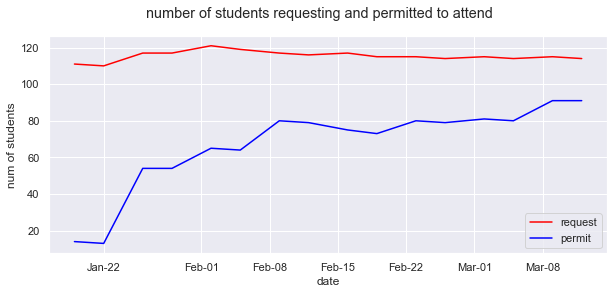

In [29]:
# making it look nice
sns.set()
#assgin the day value

#plot the request
plt.plot(date, request, label = 'request', color = 'red')
# plot the permit
plt.plot(date, permit, label = 'permit', color = 'blue')

#set the label
plt.xlabel('date')
plt.ylabel('num of students')
# set the title
plt.suptitle('number of students requesting and permitted to attend')

# show the label of each line chart
plt.legend()


# format x tick labels using strptime/strftime format string

my_fmt = mdates.DateFormatter('%b-%d')
plt.gca().xaxis.set_major_formatter(my_fmt)
# set the size of the chart
plt.gcf().set_size_inches(10, 4)


